# Churn Project Using Machine Learning Techiques

# PROBLEM STATEMENT
# To Predict Customer Churn Model based on various Variables like Customer Profile, Customer Account Information & Services that he has signed up for etc.

# Importing All The Required Libraries

In [65]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Reading CSV file from Local Disk

In [66]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\project.csv")

# Discarding Unwanted Column 

In [67]:
del x["customerID"]

# Replacing The Alpahbets and punctation marks 

In [68]:
x["TotalCharges"]=x["TotalCharges"].str.replace("[^0-9,.]","",regex=True)

#  Converting The Total Charges Column From Object to Integer

In [69]:
x["TotalCharges"]=pd.to_numeric(x["TotalCharges"])

In [70]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# One Continous Variable

# 1. Histogram

# 2. Box Plot

# 3. Pandas Plotting


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'HISTOGRAM ')

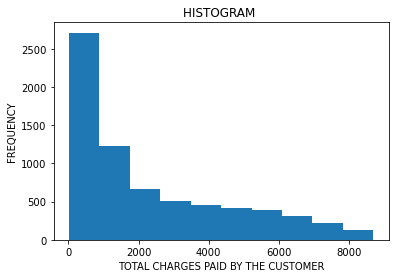

In [72]:
plt.hist(x["TotalCharges"])
plt.xlabel("TOTAL CHARGES PAID BY THE CUSTOMER")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM ")

Text(0.5, 1.0, 'DISTPLOT')

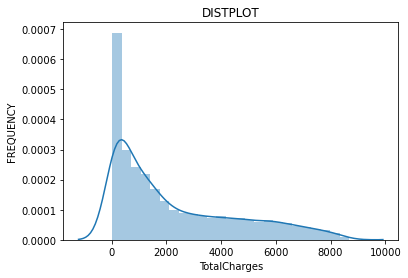

In [73]:
sns.distplot(x["TotalCharges"])
plt.ylabel("FREQUENCY")
plt.title("DISTPLOT")

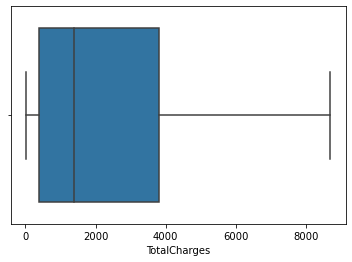

In [74]:
sns.boxplot(x["TotalCharges"])

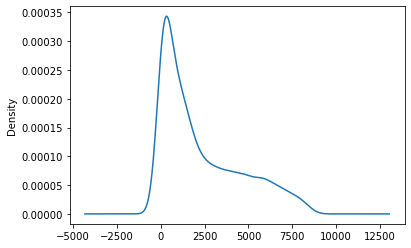

In [75]:
a=pd.Series(x["TotalCharges"]).plot(kind="density")

# One Discrete Variable 

# 1. Bar Chart
# 2. Pie Chart

Text(0.5, 1.0, 'BAR CHART')

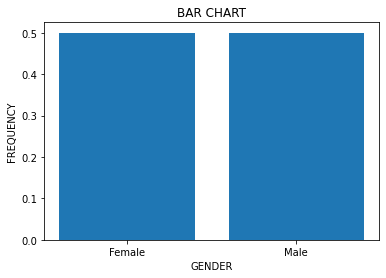

In [76]:
plt.bar(x["gender"],height=0.5)
plt.xlabel("GENDER")
plt.ylabel("FREQUENCY")
plt.title("BAR CHART")

Text(0.5, 1.0, 'COUNT PLOT')

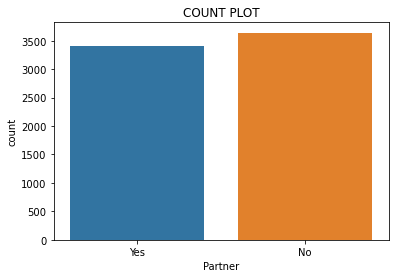

In [77]:
sns.countplot(x["Partner"])
plt.title("COUNT PLOT")

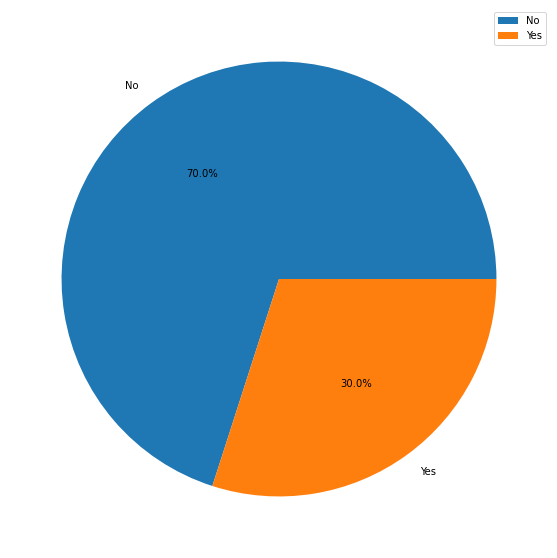

In [78]:
plt.figure(figsize=(10,10))
i=x["Dependents"].value_counts().values
v=x["Dependents"].value_counts().index
plt.pie(i,labels=v,autopct="%.1f%%")
plt.legend()


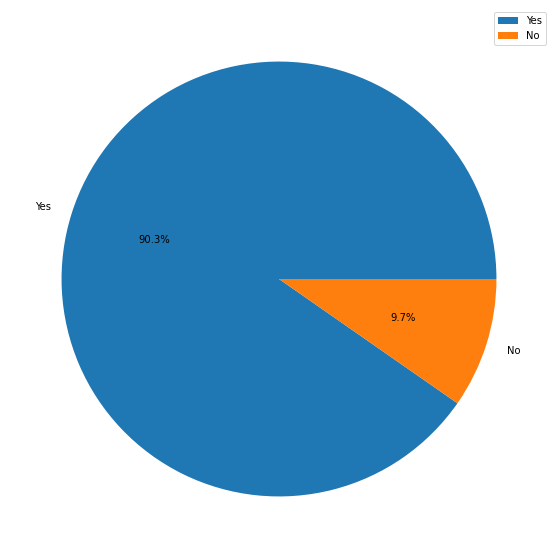

In [80]:
plt.figure(figsize=(10,10))
i=x["PhoneService"].value_counts().values
v=x["PhoneService"].value_counts().index
plt.pie(i,labels=v,autopct="%.1f%%")
plt.legend()

# Two Continous Variables

# 1. Scatter Plot

Text(0.5, 1.0, 'SCATTER PLOT')

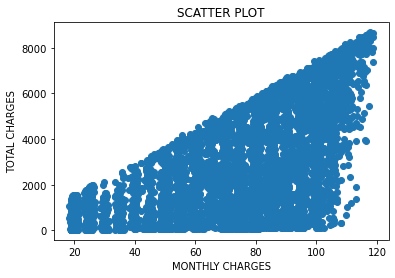

In [81]:
plt.scatter(x["MonthlyCharges"],x["TotalCharges"])
plt.xlabel("MONTHLY CHARGES")
plt.ylabel("TOTAL CHARGES")
plt.title("SCATTER PLOT")

Text(0.5, 1.0, 'REG PLOT')

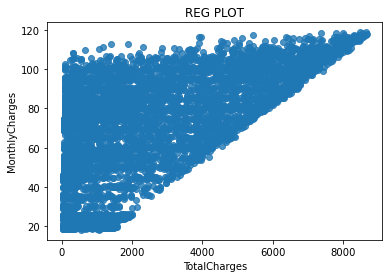

In [82]:
sns.regplot(x["TotalCharges"],x["MonthlyCharges"],fit_reg=False)
plt.title("REG PLOT")

# Converting The Object Columns to One Hot Encoding

In [83]:
x=pd.get_dummies(x,drop_first=True)

# Two Discrete Variables

# 1. Dodged Bar Chart

# 2. Stacked Bar Chart

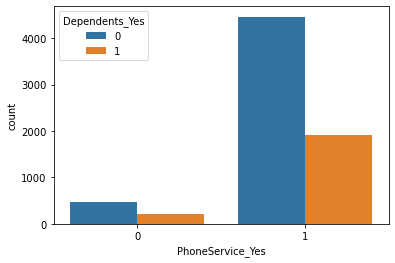

In [84]:
sns.countplot(x="PhoneService_Yes",hue="Dependents_Yes",data=x)

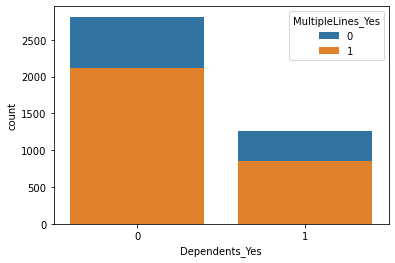

In [86]:
sns.countplot(x="Dependents_Yes",hue="MultipleLines_Yes",data=x,dodge=False)

# Plotting Multiple Plots

Text(0, 0.5, 'COUNT')

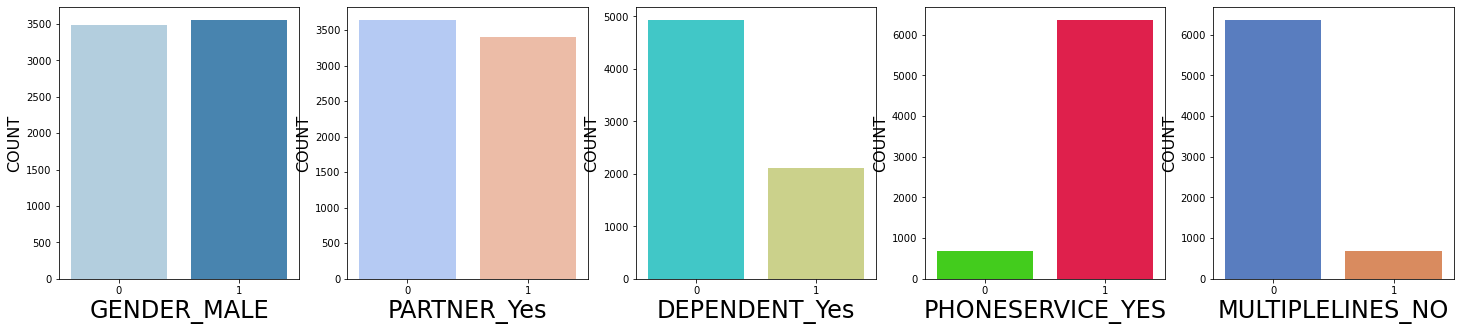

In [106]:
fig,axes=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(x["gender_Male"],ax=axes[0],palette="Blues")
axes[0].set_xlabel("GENDER_MALE",fontsize=24)
axes[0].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["Partner_Yes"],ax=axes[1],palette="coolwarm")
axes[1].set_xlabel("PARTNER_Yes",fontsize=24)
axes[1].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["Dependents_Yes"],ax=axes[2],palette="rainbow")
axes[2].set_xlabel("DEPENDENT_Yes",fontsize=24)
axes[2].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["PhoneService_Yes"],ax=axes[3],palette="prism")
axes[3].set_xlabel("PHONESERVICE_YES",fontsize=24)
axes[3].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["MultipleLines_No phone service"],ax=axes[4],palette="muted")
axes[4].set_xlabel("MULTIPLELINES_NO",fontsize=24)
axes[4].set_ylabel("COUNT",fontsize=16)


Text(0, 0.5, 'COUNT')

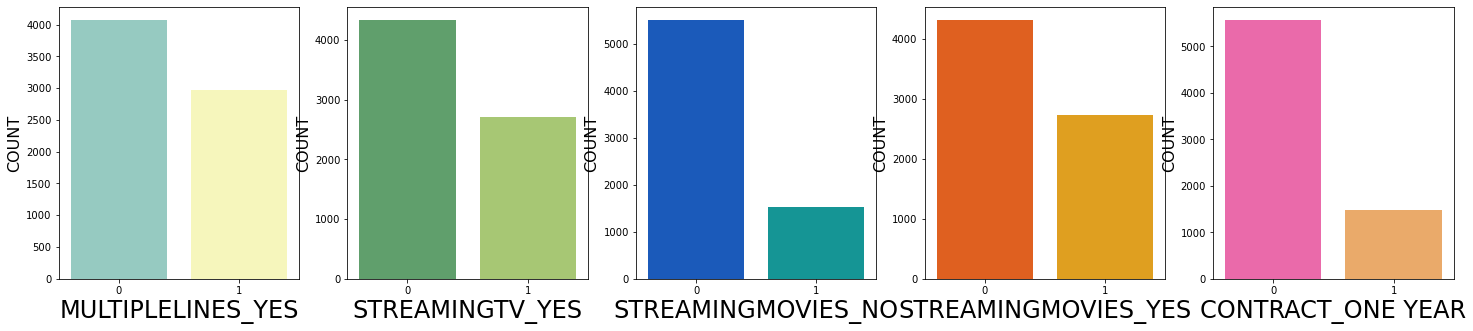

In [117]:
fig,axes=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(x["MultipleLines_Yes"],ax=axes[0],palette="Set3")
axes[0].set_xlabel("MULTIPLELINES_YES",fontsize=24)
axes[0].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["StreamingTV_Yes"],ax=axes[1],palette="summer")
axes[1].set_xlabel("STREAMINGTV_YES",fontsize=24)
axes[1].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["StreamingMovies_No internet service"],ax=axes[2],palette="winter")
axes[2].set_xlabel("STREAMINGMOVIES_NO",fontsize=24)
axes[2].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["StreamingMovies_Yes"],ax=axes[3],palette="autumn")
axes[3].set_xlabel("STREAMINGMOVIES_YES",fontsize=24)
axes[3].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["Contract_One year"],ax=axes[4],palette="spring")
axes[4].set_xlabel("CONTRACT_ONE YEAR",fontsize=24)
axes[4].set_ylabel("COUNT",fontsize=16)

Text(0, 0.5, 'COUNT')

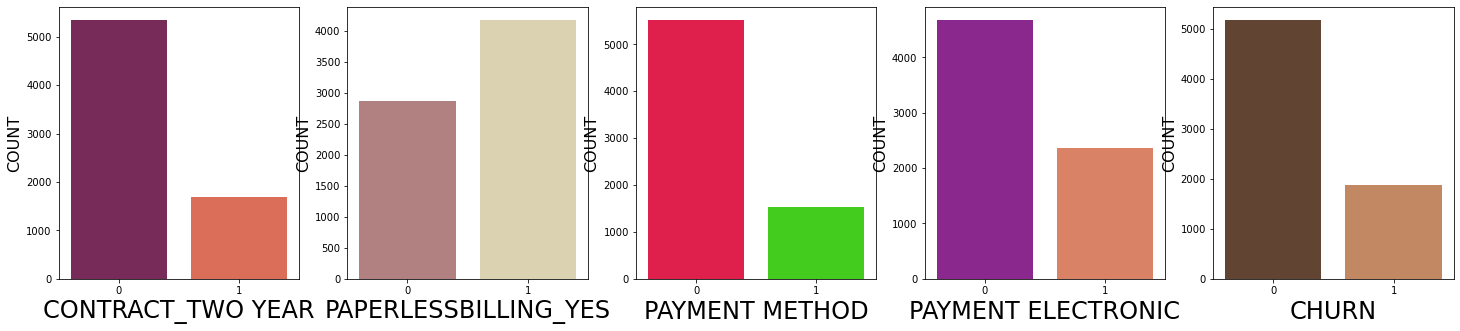

In [129]:
fig,axes=plt.subplots(ncols=5,figsize=(25,5))
sns.countplot(x["Contract_Two year"],ax=axes[0],palette="rocket")
axes[0].set_xlabel("CONTRACT_TWO YEAR",fontsize=24)
axes[0].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["PaperlessBilling_Yes"],ax=axes[1],palette="pink")
axes[1].set_xlabel("PAPERLESSBILLING_YES",fontsize=24)
axes[1].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["PaymentMethod_Credit card (automatic)"],ax=axes[2],palette="prism_r")
axes[2].set_xlabel("PAYMENT METHOD",fontsize=24)
axes[2].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["PaymentMethod_Electronic check"],ax=axes[3],palette="plasma")
axes[3].set_xlabel("PAYMENT ELECTRONIC",fontsize=24)
axes[3].set_ylabel("COUNT",fontsize=16)
sns.countplot(x["Churn_Yes"],ax=axes[4],palette="copper")
axes[4].set_xlabel("CHURN",fontsize=24)
axes[4].set_ylabel("COUNT",fontsize=16)

# Dropping Null Values from Total Charges Column

In [130]:
x.dropna(axis=0,how="any",inplace=True)

# Splitting The Input and Target Variable

In [131]:
a=x.drop(["Churn_Yes"],axis=1)
b=x["Churn_Yes"]

# Importing All the Required Algorithms From SKlearn Package

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Creating An Object for all Algorithms

In [133]:
log=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,max_leaf_nodes=10,random_state=123)
rf=RandomForestClassifier(n_estimators=300,max_depth=8,min_samples_leaf=10,max_features="auto",random_state=123)
gb=GradientBoostingClassifier(n_estimators=500,max_depth=12,learning_rate=0.01,max_features="sqrt",subsample=0.3,random_state=123)
xg=XGBClassifier(n_estimators=300,subsample=0.5,learning_rate=0.01)
nb=GaussianNB()
k=KNeighborsClassifier(n_neighbors=7)
s=SVC(kernel="rbf",C=0.01,gamma=0.5,probability=True)

# Splitting The Data Into Train and Test

In [134]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=123)

# Splitting The Data Into Train and Validation Sets

In [135]:
x_val,x_test1,y_val,y_test1=train_test_split(x_test,y_test,test_size=0.3,random_state=123)

In [136]:
eval=[(x_train,y_train),(x_val,y_val)]

# Fitting All The Models

In [137]:
log.fit(x_train,y_train)

LogisticRegression()

In [138]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=123)

In [139]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=300,
                       random_state=123)

In [140]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=12,
                           max_features='sqrt', n_estimators=500,
                           random_state=123, subsample=0.3)

In [141]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
nb.fit(x_train,y_train)

GaussianNB()

In [143]:
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [144]:
s.fit(x_train,y_train)

SVC(C=0.01, gamma=0.5, probability=True)

# Vizuvalising The Feature Importance

(0.0, 0.25)

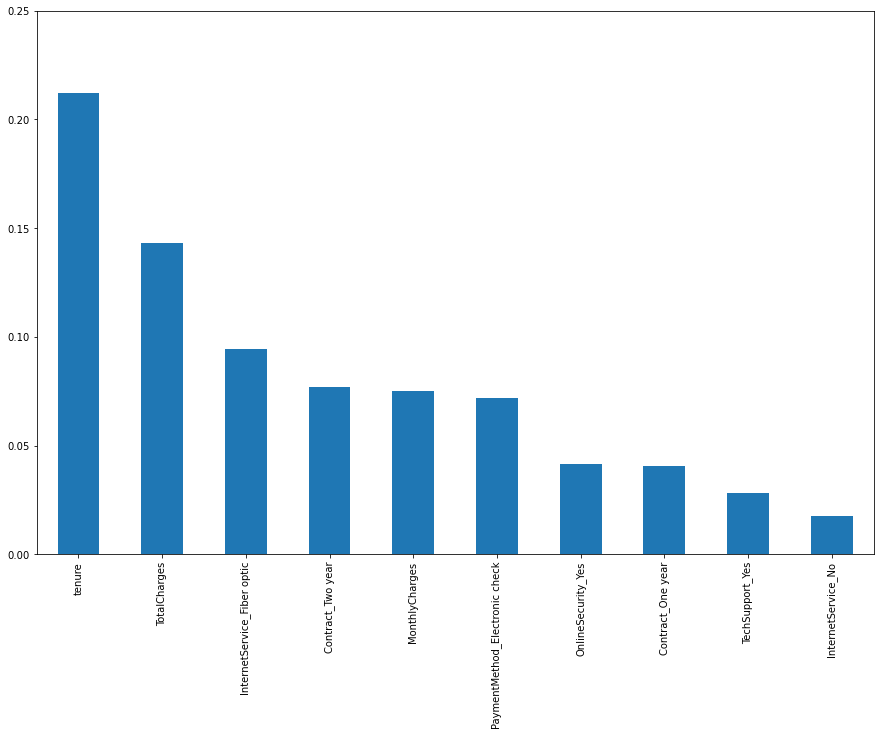

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
c=pd.Series(rf.feature_importances_,index=x_train.columns)
c.nlargest(10).plot(kind="bar")
plt.ylim(0.0,0.25)

In [155]:
pred=log.predict(x_test1)
pred1=dt.predict(x_test1)
pred2=rf.predict(x_test1)
pred3=gb.predict(x_test1)
pred4=xg.predict(x_test1)
pred5=nb.predict(x_test1)
pred6=k.predict(x_test1)
pred7=s.predict(x_test1)

# Plotting Confusion Matrix for All Models

Text(0.5, 1.0, 'DECISION TREE CONFUSION MATRIX')

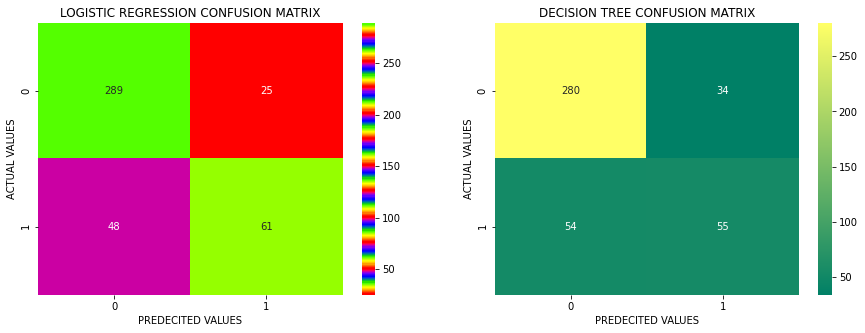

In [156]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred),annot=True,fmt=".0f",cmap="prism",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("LOGISTIC REGRESSION CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred1),annot=True,fmt=".0f",cmap="summer",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("DECISION TREE CONFUSION MATRIX")

Text(0.5, 1.0, 'GRADIENT BOOSTING CONFUSION MATRIX')

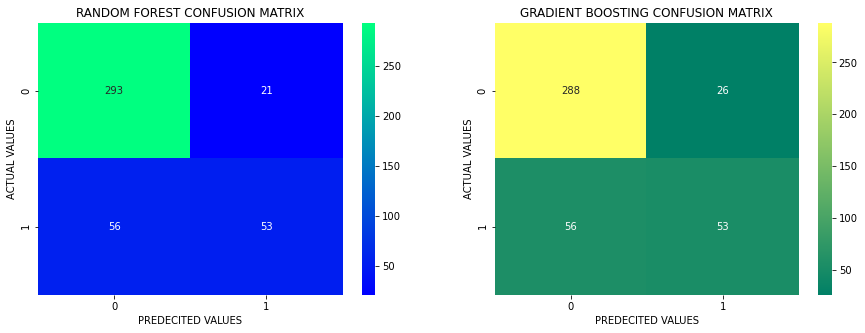

In [157]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred2),annot=True,fmt=".0f",cmap="winter",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("RANDOM FOREST CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred3),annot=True,fmt=".0f",cmap="summer",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("GRADIENT BOOSTING CONFUSION MATRIX")

Text(0.5, 1.0, 'GAUSSIAN NAVIE BAYES CONFUSION MATRIX')

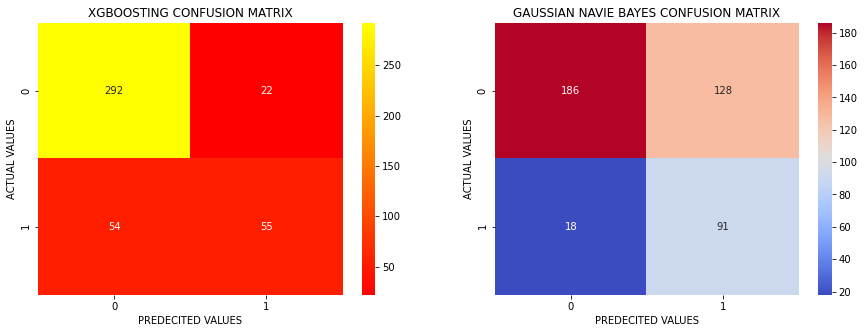

In [158]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred4),annot=True,fmt=".0f",cmap="autumn",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("XGBOOSTING CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred5),annot=True,fmt=".0f",cmap="coolwarm",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("GAUSSIAN NAVIE BAYES CONFUSION MATRIX")

Text(0.5, 1.0, 'SUPPORT VECTOR MACHINES CONFUSION MATRIX')

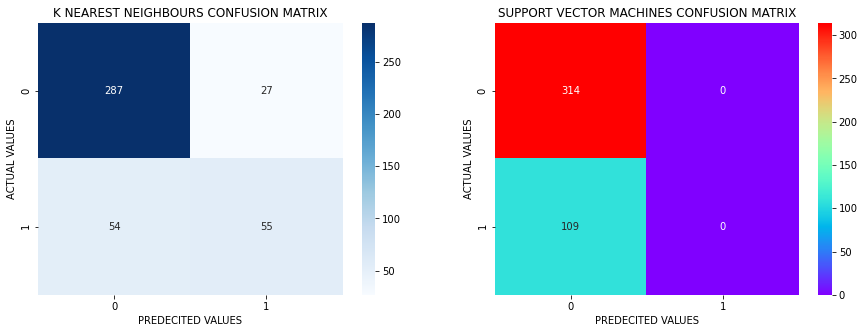

In [159]:
import seaborn as sns
fig,axes=plt.subplots(ncols=2,figsize=(15,5))
sns.heatmap(confusion_matrix(y_test1,pred6),annot=True,fmt=".0f",cmap="Blues",ax=axes[0])
axes[0].set_xlabel("PREDECITED VALUES")
axes[0].set_ylabel("ACTUAL VALUES")
axes[0].set_title("K NEAREST NEIGHBOURS CONFUSION MATRIX")

sns.heatmap(confusion_matrix(y_test1,pred7),annot=True,fmt=".0f",cmap="rainbow",ax=axes[1])
axes[1].set_xlabel("PREDECITED VALUES")
axes[1].set_ylabel("ACTUAL VALUES")
axes[1].set_title("SUPPORT VECTOR MACHINES CONFUSION MATRIX")

# Plotting All The Metrics 

In [160]:
d={
    "PRECISION":[0.71,0.48,0.72,0.74,0.63,0.42,0.61,0.00],
    "RECALL":[0.56,0.49,0.50,0.51,0.52,0.83,0.50,0.00],
}

In [161]:
f={
    "F1-SCORE":[0.63,0.48,0.59,0.61,0.57,0.55,0.55,0.00],
     "ACCURACY":[0.83,0.73,0.82,0.83,0.80,0.65,0.79,0.74]
}

In [162]:
d1=pd.DataFrame(d,index=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GRADIENT BOOSTING","XG BOOSTING","GAUSSIAN NAVIE BAYES","K NEAREST NEIGHBOURS","SUPPORT VECTOR MACHINES"])

In [163]:
f1=pd.DataFrame(f,index=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GRADIENT BOOSTING","XG BOOSTING","GAUSSIAN NAVIE BAYES","K NEAREST NEIGHBOURS","SUPPORT VECTOR MACHINES"])

In [164]:
d1

,PRECISION,RECALL
LOGISTIC REGRESSION,0.71,0.56
DECISION TREE,0.48,0.49
RANDOM FOREST,0.72,0.50
GRADIENT BOOSTING,0.74,0.51
XG BOOSTING,0.63,0.52
GAUSSIAN NAVIE BAYES,0.42,0.83
K NEAREST NEIGHBOURS,0.61,0.50
SUPPORT VECTOR MACHINES,0.00,0.00


In [165]:
f1

,F1-SCORE,ACCURACY
LOGISTIC REGRESSION,0.63,0.83
DECISION TREE,0.48,0.73
RANDOM FOREST,0.59,0.82
GRADIENT BOOSTING,0.61,0.83
XG BOOSTING,0.57,0.80
GAUSSIAN NAVIE BAYES,0.55,0.65
K NEAREST NEIGHBOURS,0.55,0.79
SUPPORT VECTOR MACHINES,0.00,0.74


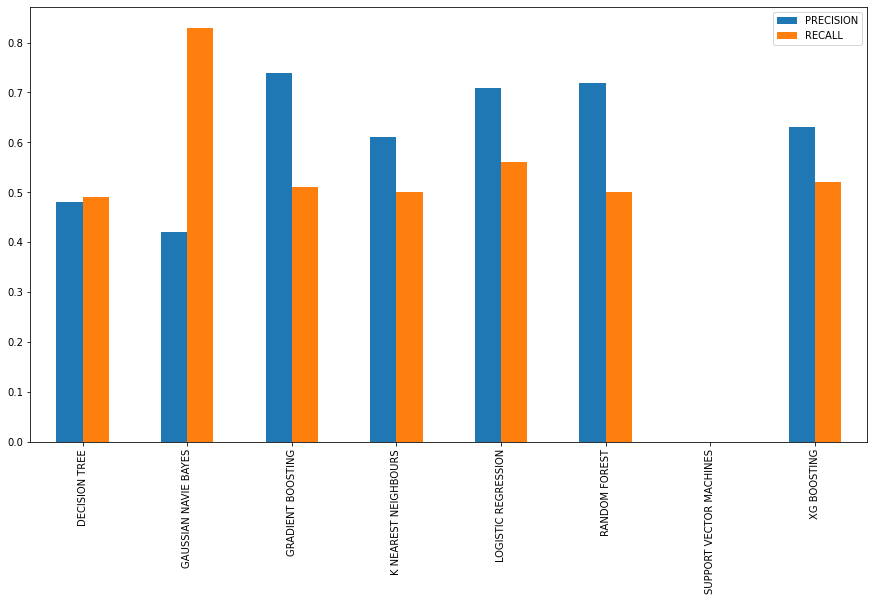

In [166]:
d1.sort_index().plot(kind="bar",figsize=(15,8))

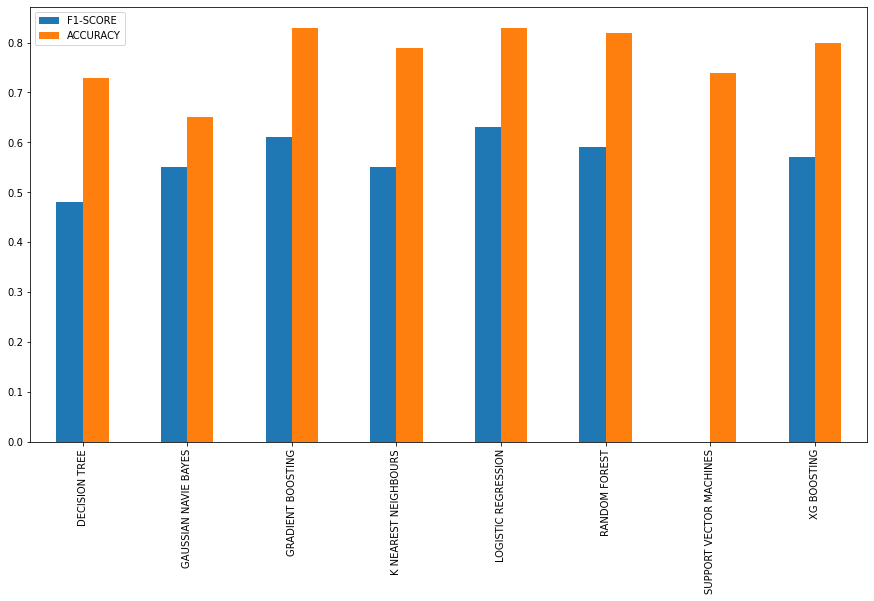

In [167]:
f1.sort_index().plot(kind="bar",figsize=(15,8))

# Vizuvalising The Tree Plot From Decision Tree

No handles with labels found to put in legend.


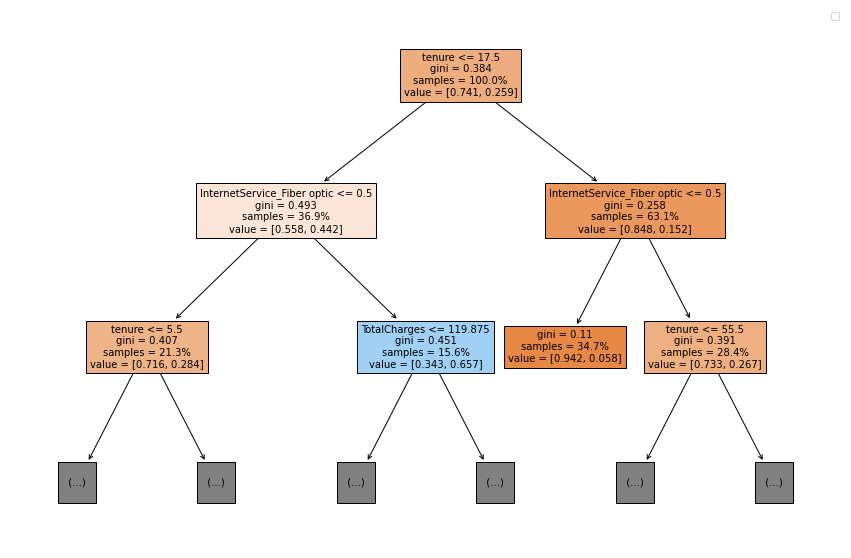

In [168]:
plt.figure(figsize=(15,10))
plot_tree(dt,feature_names=x_train.columns,filled=True,proportion=True,max_depth=2,fontsize=10)
plt.legend()

# Plotting The Roc Curve and AUC score of All Algorithms

In [169]:
from sklearn.metrics import roc_curve,roc_auc_score

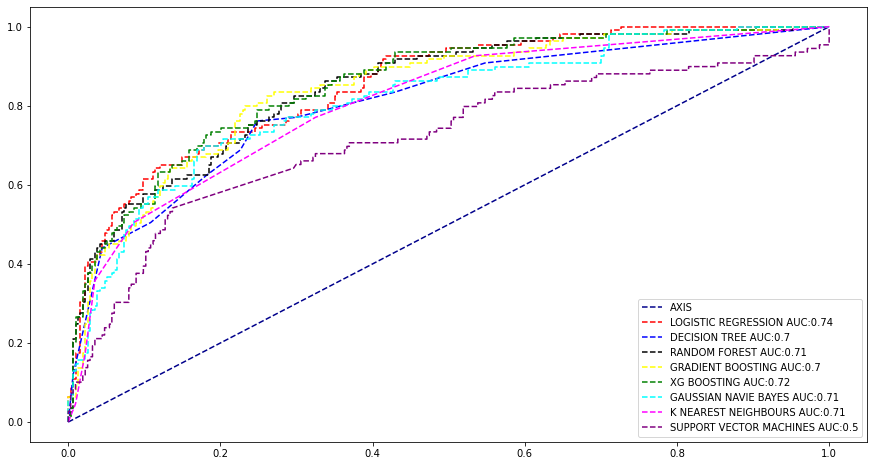

In [170]:
plt.figure(figsize=(15,8))
predict=log.predict_proba(x_test1) [:,1]
predict1=dt.predict_proba(x_test1) [:,1]
predict2=rf.predict_proba(x_test1) [:,1]
predict3=gb.predict_proba(x_test1) [:,1]
predict4=xg.predict_proba(x_test1) [:,1]
predict5=nb.predict_proba(x_test1) [:,1]
predict6=k.predict_proba(x_test1) [:,1]
predict7=s.predict_proba(x_test1) [:,1]
fpr,tpr,t=roc_curve(y_test1,predict)
fpr1,tpr1,t1=roc_curve(y_test1,predict1)
fpr2,tpr2,t2=roc_curve(y_test1,predict2)
fpr3,tpr3,t3=roc_curve(y_test1,predict3)
fpr4,tpr4,t4=roc_curve(y_test1,predict4)
fpr5,tpr5,t5=roc_curve(y_test1,predict5)
fpr6,tpr6,t6=roc_curve(y_test1,predict6)
fpr7,tpr7,t7=roc_curve(y_test1,predict7)
plt.plot([0,1],[0,1],"--",color='darkblue',label="AXIS")
plt.plot(fpr,tpr,"--",color="red",label="LOGISTIC REGRESSION AUC:"+str(round(roc_auc_score(y_test1,pred*100),2)))
plt.plot(fpr1,tpr1,"--",color="blue",label="DECISION TREE AUC:"+str(round(roc_auc_score(y_test1,pred1*100),2)))
plt.plot(fpr2,tpr2,"--",color="black",label="RANDOM FOREST AUC:"+str(round(roc_auc_score(y_test1,pred2*100),2)))
plt.plot(fpr3,tpr3,"--",color="yellow",label="GRADIENT BOOSTING AUC:"+str(round(roc_auc_score(y_test1,pred3*100),2)))
plt.plot(fpr4,tpr4,"--",color="green",label="XG BOOSTING AUC:"+str(round(roc_auc_score(y_test1,pred4*100),2)))
plt.plot(fpr5,tpr5,"--",color="cyan",label="GAUSSIAN NAVIE BAYES AUC:"+str(round(roc_auc_score(y_test1,pred5*100),2)))
plt.plot(fpr6,tpr6,"--",color="magenta",label="K NEAREST NEIGHBOURS AUC:"+str(round(roc_auc_score(y_test1,pred6*100),2)))
plt.plot(fpr7,tpr7,"--",color="purple",label="SUPPORT VECTOR MACHINES AUC:"+str(round(roc_auc_score(y_test1,pred7*100),2)))
plt.legend()